In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [12]:
df  = pd.read_csv("global_energy_2.csv")
df.sort_values(by="Year",ascending = False,inplace = True)

In [ ]:
df_India = df[df["Country"]=="India"]
df_Japan = df[df["Country"]=="Japan"]
df_Germany = df[df["Country"]=="Germany"]
df_Russia = df[df["Country"]=="Russia"]
df_Canada = df[df["Country"]=="Canada"]
df_Brazil = df[df["Country"]=="Brazil"]
df_UK = df[df["Country"]=="UK"]
df_China = df[df["Country"]=="China"]
df_Australia  = df[df["Country"]=="Australia"]
                   
df_India.reset_index(inplace=True)

C:\Users\salan\AppData\Local\Temp\ipykernel_19804\2531753116.py:16: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax1.legend(handles=[plot1,plot2],labels=["Energy_Used","C02"],loc= "upper left" )


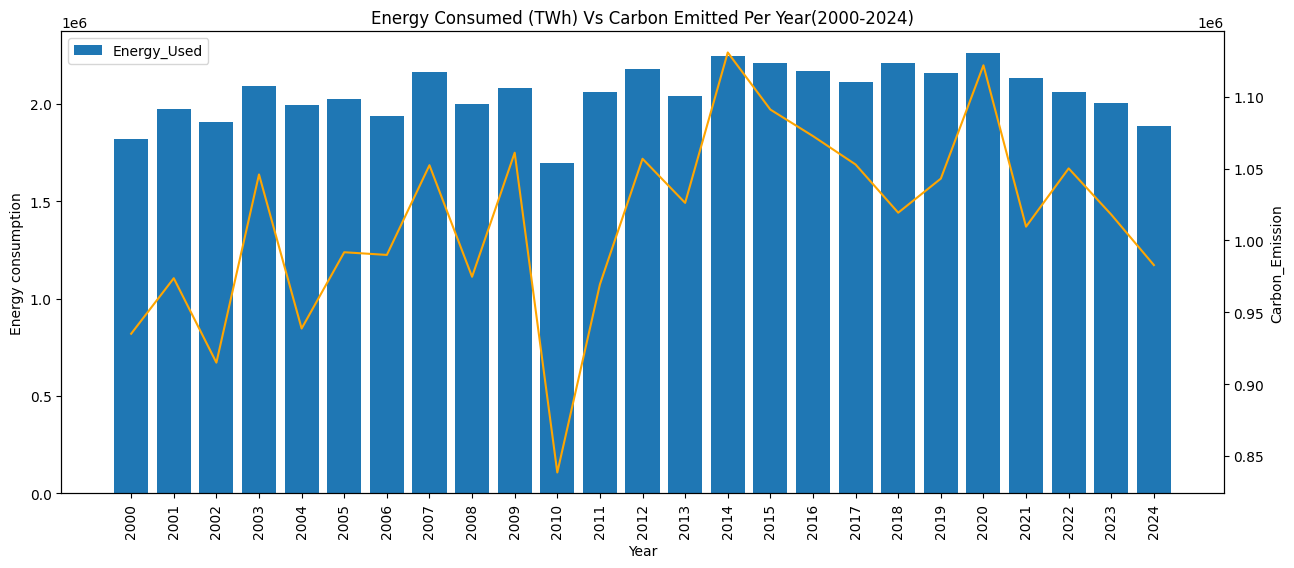

In [ ]:
df["Energy Consumed Per Year (TWh)"]=df.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
carbon_world=df.groupby(["Year"])["Carbon Emissions (Million Tons)"].sum()
carbon_world = pd.DataFrame(carbon_world)
world_energy =df.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
world_energy = pd.DataFrame(world_energy)
fig,ax1= plt.subplots(figsize= (15,6))
plot1 = ax1.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Energy consumption")
ax1.set_xticks(df["Year"].unique())
plt.xticks(rotation= 90)
ax2 = ax1.twinx()
plot2 = ax2.plot(carbon_world.index,carbon_world["Carbon Emissions (Million Tons)"],color = "orange")
ax2.set_ylabel("Carbon_Emission")
plt.title("Energy Consumed (TWh) Vs Carbon Emitted Per Year(2000-2024)")
ax1.legend(handles=[plot1,plot2],labels=["Energy_Used","C02"],loc= "upper left" )



Text(0.5, 1.0, 'Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country')

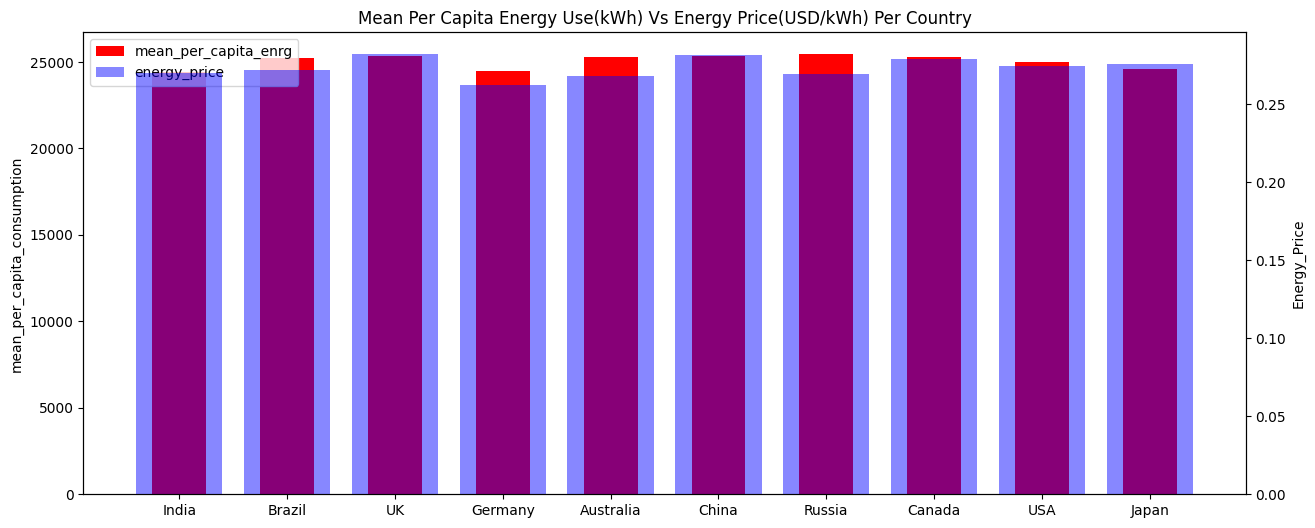

In [15]:

df["per_capita_consumption_mean"]= df.groupby("Country")["Per Capita Energy Use (kWh)"].transform("mean")
df["mean_energy_price_index(USD/kWh)"]= df.groupby(["Country"])["Energy Price Index (USD/kWh)"].transform("mean")
max_PCE= df["per_capita_consumption_mean"].max()
x=np.arange(10)
fig,ax1 = plt.subplots(figsize=(15,6))
bars = ax1.bar(df["Country"].unique(),df["per_capita_consumption_mean"].unique(),color ="red",width=0.5)
ax1.set_ylabel("mean_per_capita_consumption")
ax2= ax1.twinx()
plot = ax2.bar(df["Country"].unique(),df["mean_energy_price_index(USD/kWh)"].unique(),label="enery_price(USD/kWh)",color="blue",alpha=0.47)
ax2.set_ylabel("Energy_Price")
ax1.set_xticks(df["Country"].unique())
ax1.legend(
    handles=[bars,plot],
    labels=["mean_per_capita_enrg","energy_price"],
    loc="upper left"
)
plt.title("Mean Per Capita Energy Use(kWh) Vs Energy Price(USD/kWh) Per Country")



C:\Users\salan\AppData\Local\Temp\ipykernel_19804\2364125427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IEC_mean_data.drop_duplicates(inplace = True)


Text(0.5, 1.0, 'Industrial Energy Consumption Percentage(%) in 2024 ')

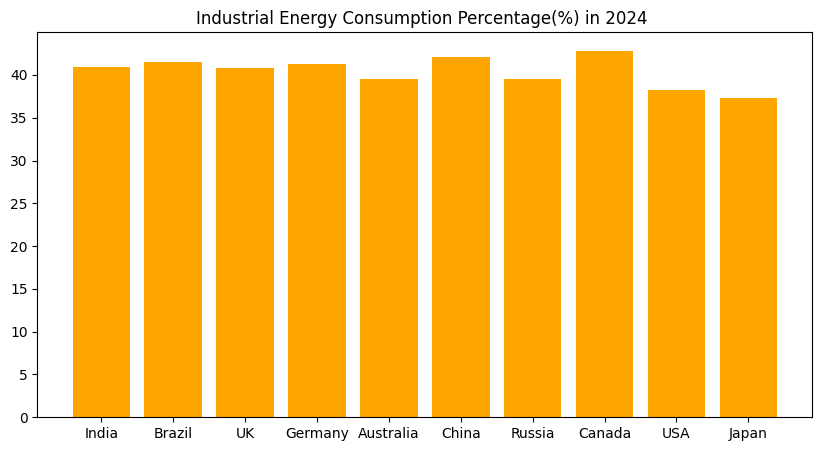

In [16]:
IEC = df.loc[df["Year"]==2024,["Country","Year","Industrial Energy Use (%)"]]

IEC["IEC_mean(%)"] = IEC.groupby(["Country"])["Industrial Energy Use (%)"].transform("mean")
IEC.sample(10)
IEC_mean_data = IEC[["Country","Year","IEC_mean(%)"]]
IEC_mean_data.drop_duplicates(inplace = True)
IEC_mean_data
plt.figure(figsize=(10,5))
plt.bar(IEC_mean_data["Country"],IEC_mean_data["IEC_mean(%)"],color="orange")
plt.title("Industrial Energy Consumption Percentage(%) in 2024 ")


In [17]:
df.sample(10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Energy Consumed Per Year (TWh),per_capita_consumption_mean,mean_energy_price_index(USD/kWh)
5543,Canada,2015,716.00,13336.58,43.07,55.12,20.39,13.82,3270.51,0.33,2208997.64,25269.836618,0.279154
2258,Australia,2024,587.87,38133.25,62.64,10.68,20.40,32.97,1627.74,0.48,1888162.22,25286.890891,0.268168
9326,India,2000,596.04,5733.89,55.80,41.49,34.40,23.21,4654.56,0.42,1818935.94,24438.786255,0.269819
506,India,2017,6790.33,28691.30,30.76,31.27,57.70,21.93,4696.00,0.20,2112110.76,24438.786255,0.269819
9811,USA,2002,5237.84,22247.77,47.92,27.31,55.84,38.25,918.74,0.36,1908410.61,25010.767341,0.274330
867,Australia,2003,3553.73,38847.99,63.18,21.56,25.84,11.37,576.84,0.24,2092794.51,25286.890891,0.268168
6208,UK,2001,3683.35,29780.33,55.57,56.06,47.33,31.70,2757.97,0.41,1974854.60,25360.567108,0.281992
3568,Australia,2008,4015.62,46549.65,72.13,14.33,44.95,12.10,2228.92,0.06,1996911.00,25286.890891,0.268168
6223,Germany,2023,2314.88,48409.12,39.35,21.88,25.97,17.46,3758.11,0.12,2003787.37,24475.385932,0.262245
6030,India,2013,3491.85,33533.84,17.51,74.47,29.17,19.81,243.54,0.13,2042617.92,24438.786255,0.269819


C:\Users\salan\AppData\Local\Temp\ipykernel_19804\1064264207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India["Total_energy_consumption_per_year"]= df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
C:\Users\salan\AppData\Local\Temp\ipykernel_19804\1064264207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_India["Mean_energy_consumption_percentage_per_year"]= df_India.groupby(["Year"])["Renewable Energy Share (%)"].transform("mean")


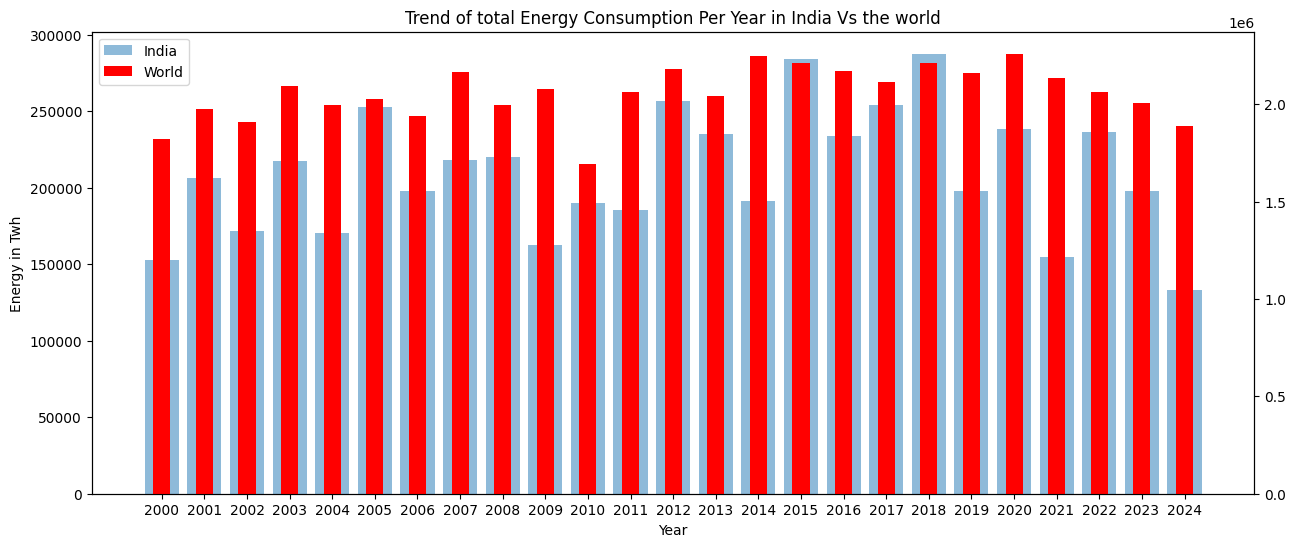

In [18]:
df_India.head()
df_India["Total_energy_consumption_per_year"]= df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].transform("sum")
india_energy=df_India.groupby(["Year"])["Total Energy Consumption (TWh)"].sum()
india_energy = pd.DataFrame(india_energy)
df_India["Mean_energy_consumption_percentage_per_year"]= df_India.groupby(["Year"])["Renewable Energy Share (%)"].transform("mean")
fig,ax1= plt.subplots(figsize=(15,6))
bar = ax1.bar(india_energy.index,india_energy["Total Energy Consumption (TWh)"],alpha=0.5)
ax1.set_xticks(df["Year"].unique())
ax1.set_ylabel("Energy in Twh")
ax1.set_xlabel("Year")
ax2 = ax1.twinx()
bar2 = ax2.bar(world_energy.index,world_energy["Total Energy Consumption (TWh)"],color="red",width=0.4)
plt.xticks(rotation=90)
plt.title("Trend of total Energy Consumption Per Year in India Vs the world")
ax1.legend(handles=[bar,bar2],labels=["India","World"],loc="upper left")

In [20]:
df_India.sample(10)

,index,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh),Total_energy_consumption_per_year,Mean_energy_consumption_percentage_per_year
682,9790,India,2008,5893.98,33407.56,42.01,62.79,59.62,26.36,1625.87,0.27,219850.41,45.620976
714,1174,India,2007,2708.76,29332.52,24.73,67.01,22.47,36.36,2563.93,0.10,218175.74,50.574000
639,569,India,2009,4383.78,12384.75,62.05,15.06,31.28,39.24,4752.73,0.09,162323.00,48.543784
836,3094,India,2004,3253.11,8864.54,69.43,18.95,55.93,28.28,2511.66,0.34,170632.23,47.401389
504,1633,India,2012,5759.66,41682.89,51.82,59.96,34.06,22.21,2798.52,0.37,256452.81,52.163148
567,748,India,2011,5871.76,45816.19,77.33,32.16,33.72,24.23,2697.47,0.14,185492.93,44.491212
192,2159,India,2020,1204.34,14523.49,15.13,25.49,51.00,26.38,2299.65,0.17,238187.52,47.677727
726,1247,India,2007,6890.14,29454.41,27.55,17.46,57.02,24.30,686.32,0.16,218175.74,50.574000
922,7845,India,2002,738.77,42386.47,17.32,12.79,33.99,23.88,2811.80,0.37,171904.46,49.095667
204,5470,India,2019,8283.71,16157.73,79.53,38.09,41.35,34.65,472.30,0.22,197525.21,50.535938
